In [3]:
import numpy as np
import pandas as pd


def euc_distance(x,w):
    subtraction = np.subtract(x,w)
    d = np.dot(subtraction.T,subtraction)
    return d

def distance(data,weights):
    distances = np.zeros((weights.shape[0]))
    for i in range(weights.shape[0]):
        distances[i] = euc_distance(data, weights[i,:])
        
    return distances


def initialize_weights(nRows,nColumns,mean = 0,sigma = 1,circular = False):
    weights = np.zeros((nRows,nColumns)) #dimension of weights: number of nodes X number of features
    if circular:
        weights = np.random.multivariate_normal(mean,sigma*np.identity(len(mean)),nRows)
        
    else:
        
        aux=np.arange(0,1,0.01)
        for i in range(nRows):
            weights[i,:] = aux[i]
    
    return weights

def update_weights(weights,distances,data_point,eta,neighbours,circular = False):
    maximum_node = np.argmin(distances)
    
    if circular:
        
        for i in range(maximum_node-neighbours,maximum_node+neighbours+1):
            proportion = 2**(int(-abs(maximum_node-i)))
            weights[i%len(weights.shape[0]),:] = np.add(weights[i%len(weights.shape[0]),:],eta*np.subtract(data_point,weights[i%len(weights.shape[0]),:]))*proportion
        
    else:
        if neighbours <= 0:
            weights[maximum_node,:] = eta*np.add(weights[maximum_node,:],np.subtract(data_point,weights[maximum_node,:]))
            return weights
        else:
            top_neighbour = maximum_node+neighbours+1
            bottom_neighbour = maximum_node-neighbours
            
            if top_neighbour>weights.shape[0]:
                top_neighbour = weights.shape[0]
                
            if bottom_neighbour<0:
                bottom_neighbour = 0
            
            
            for i in range(bottom_neighbour,top_neighbour):
                proportion = 2**(int(-abs(maximum_node-i)))
                weights[i,:] = eta*np.add(weights[i,:],np.subtract(data_point,weights[i,:]))*proportion
            
            
    return weights
    
def update_weights_uniform(weights,distances,data_point,eta,neighbours,circular = False):
    maximum_node = np.argmin(distances)
    if circular:
        
        for i in range(maximum_node-neighbours,maximum_node+neighbours+1):
            weights[i%(weights.shape[0]),:] = np.add(weights[i%(weights.shape[0]),:],eta*np.subtract(data_point,weights[i%(weights.shape[0]),:]))
    else: 
        
        if neighbours <= 0:
            weights[maximum_node,:] =np.add(weights[maximum_node,:], eta*np.subtract(data_point,weights[maximum_node,:]))
            return weights
        else:
            top_neighbour = maximum_node+neighbours+1
            bottom_neighbour = maximum_node-neighbours
            
            if top_neighbour>weights.shape[0]:
                top_neighbour = weights.shape[0]
                
            if bottom_neighbour<0:
                bottom_neighbour = 0
            
            
            for i in range(bottom_neighbour,top_neighbour):
                weights[i,:] = np.add(weights[i,:], eta*np.subtract(data_point,weights[i,:]))
            
                
    return weights

def print_min(final_node,names):
    copy = final_node.copy()
    order = np.arange(len(final_node))
    for i in range(len(final_node)):
        min_position = np.argmin(copy)
        min_node = min(copy)
        print('The node of animal '+str(names[min_position])+' is '+str(int(min_node)))
        copy[min_position] = 1000
        
def clean_data(data):
    data = pd.DataFrame(data).iloc[:,0].tolist()
    for i in range(len(data)):
        data[i]=data[i].replace("\t","")
        data[i]=data[i].replace("\'","")
        data[i]=data[i].replace("[","")
        data[i]=data[i].replace("]","")
        data[i]=data[i].replace(";","")
        
        
    return data
        
    

C:\Users\dumit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.


[[0.51366815 0.92990699]
 [0.24291884 0.7594759 ]
 [0.38835619 0.4499221 ]
 [0.17898911 0.23323993]
 [0.24771039 0.15276256]
 [0.53817688 0.23578052]
 [0.64156784 0.25930538]
 [0.8374667  0.36135087]
 [0.69674448 0.51895152]
 [0.8585464  0.6544382 ]]
[0.51366815 0.92990699]


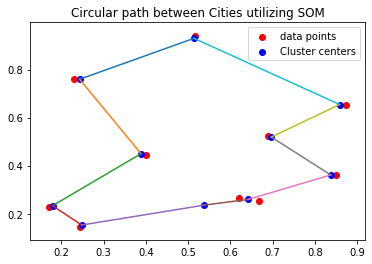

In [58]:
import pandas as pd
import numpy as np
import csv
import part_2_functions as p2f
import matplotlib.pyplot as plt


#Reading data set from .dat file
filepath=r"cities.dat"
data = pd.read_csv(filepath,header=None,sep=',|;')
data = data.to_numpy()
data=data[:,:-1]

#initializing weights
mean = np.mean(data,axis = 0 )
sigma = 0.1
weights = initialize_weights(data.shape[0],data.shape[1],mean,sigma,True)

#Running algorithm
num_epochs = 20
eta = 0.2
neighbours = 2



for epoch in range(num_epochs):
    
    for i in range(data.shape[0]):
        distances = distance(data[i,:], weights)
        weights = update_weights_uniform(weights, distances, data[i,:], eta, neighbours,True)

    if epoch>0.2*num_epochs and epoch<0.4*num_epochs:
        neighbours = 1
    elif epoch>= 0.4*num_epochs:
        neighbours = 0

print(weights)
print(weights[0])
#Printing data
plt.figure()
plt.scatter(data[:,0],data[:,1],color = 'r',label='data points')
plt.scatter(weights[:,0],weights[:,1],color = 'b',label='Cluster centers')
for i in range(weights.shape[0]-1):
    plt.plot(weights[i:i+2,0],weights[i:i+2,1])
plt.plot((weights[weights.shape[0]-1,0],weights[0,0]),(weights[weights.shape[0]-1,1],weights[0,1]))
plt.title("Circular path between Cities utilizing SOM")
plt.legend()
#plt.savefig("SOM_Cities")
plt.show()
